In [39]:
from gensim.models.word2vec import LineSentence, Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
word_vectors = KeyedVectors.load_word2vec_format(
    'data/vec.data', binary=False)  # C text format

### Znajdź 3 najbardziej podobne wyrażenia (słowa i zwroty) dla następujących wyrażeń: 

In [5]:
word_vectors.similar_by_word('kpk', 3)

[('k.p.k.', 0.9238308668136597),
 ('§_1_kpk', 0.8046623468399048),
 ('k.p.k', 0.801763653755188)]

In [7]:
word_vectors.similar_by_word('sąd_najwyższy', 3)

[('sąd_najwyższy,', 0.7725378274917603),
 ('sad_najwyższy', 0.7517997026443481),
 ('trybunał_konstytucyjny', 0.7267873883247375)]

In [9]:
word_vectors.similar_by_word('trybunał_konstytucyjny', 3)

[('trybunał', 0.7671581506729126),
 ('sąd_najwyższy', 0.7267873883247375),
 ('tsue', 0.6620593070983887)]

In [10]:
word_vectors.similar_by_word('kodeks_cywilny', 3)

[('prawo_wekslowe', 0.5703046321868896),
 ('kodeks_wykroczeń', 0.5488859415054321),
 ('kodeks', 0.5200016498565674)]

In [11]:
word_vectors.similar_by_word('kpk', 3)

[('k.p.k.', 0.9238308668136597),
 ('§_1_kpk', 0.8046623468399048),
 ('k.p.k', 0.801763653755188)]

In [12]:
word_vectors.similar_by_word('sąd_rejonowy', 3)

[('sąd_okręgowy', 0.8708255290985107),
 ('sad_rejonowy', 0.8605306148529053),
 ('sąd_meriti', 0.8116050958633423)]

In [13]:
word_vectors.similar_by_word('szkoda', 3)

[('szkoda_ta', 0.7051692605018616),
 ('szkoda_majątkowa', 0.6625838279724121),
 ('ewentualna_szkoda', 0.6476234197616577)]

In [14]:
word_vectors.similar_by_word('wypadek', 3)

[('zaistniały_wypadek', 0.5350655913352966),
 ('wypadek,', 0.5137117505073547),
 ('śmiertelny_wypadek', 0.4815601706504822)]

In [15]:
word_vectors.similar_by_word('kolizja', 3)

[('sytuacja_odwrotna.', 0.5350037813186646),
 ('awantura', 0.5323173999786377),
 ('kolizja_drogowa', 0.5318514108657837)]

In [16]:
word_vectors.similar_by_word('szkoda_majątkowa', 3)

[('szkoda', 0.6625838279724121),
 ('szkoda_niemajątkowa', 0.5895721912384033),
 ('krzywda', 0.5886932611465454)]

In [17]:
word_vectors.similar_by_word('nieszczęście', 3)

[('wydarzenie', 0.45972561836242676),
 ('przeszłości,_negatywnie', 0.45947515964508057),
 ('nieoczekiwane_zerwanie', 0.45347657799720764)]

In [18]:
word_vectors.similar_by_word('rozwód', 3)

[('rozwód.', 0.739349365234375),
 ('orzeczenie_rozwodu', 0.6363464593887329),
 ('rozwiązanie_małżeństwa', 0.6302284002304077)]

## Znajdź wypadkową operacji na słowach


In [22]:
word_vectors.most_similar(
    positive=['sąd_najwyższy', 'konstytucja'], negative=['kpc'], topn=5)

[('trybunał', 0.5822564959526062),
 ('trybunał_konstytucyjny', 0.553675651550293),
 ('sad_najwyższy', 0.5372000336647034),
 ('trybunał_sprawiedliwości', 0.5236124992370605),
 ('sąd_najwyższy,', 0.5028815865516663)]

In [24]:
word_vectors.most_similar(
    positive=['pasażer', 'kobieta'], negative=['mężczyzna'], topn=5)

[('pasażerka', 0.5614506006240845),
 ('ciężarówka', 0.4767460227012634),
 ('kierująca', 0.4572647511959076),
 ('piesza', 0.4553679823875427),
 ('kierująca_pojazdem', 0.4551154375076294)]

In [27]:
word_vectors.most_similar(
    positive=['samochód', 'rzeka'], negative=['droga'], topn=5)

[('pojazd', 0.5381954908370972),
 ('samochód_marki', 0.5236991047859192),
 ('pojazd_marki', 0.5236037969589233),
 ('pastuch', 0.5007725954055786),
 ('samochód_ciężarowy', 0.49589812755584717)]

## Korzystając z algorytmu t-SNE przedstaw projekcję wektorów następujących słów na płaszczyznę: 

In [60]:
# 'uszczerbek_na_zdrowiu' - is not in dictionary
words = [
    'szkoda', 'strata', 'uszczerbek', 'szkoda_majątkowa', 'krzywda',
    'niesprawiedliwość', 'nieszczęście'
]
vectors= [word_vectors.get_vector(x) for x in words]
transformed = TSNE().fit_transform(vectors)
x, y = zip(*transformed)

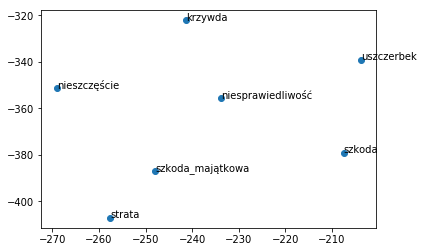

In [62]:
plt.scatter(x,y)

for i, txt in enumerate(words):
    plt.annotate(txt, (x[i],y[i]))